# ISLP - Chapter 2

# Imports and data paths

In [116]:
import site
import sys
import os
import pandas as pd
import numpy as np
import sklearn

_SITE_PACKAGES_INDEX = 1 if sys.platform == "win32" else 0
_VENV_PATH = site.getsitepackages()[_SITE_PACKAGES_INDEX]
ISLP_DATA_PATH = os.path.join(_VENV_PATH, "ISLP", "data")

# College dataset - 8 Exercise

In [101]:
college_df = pd.read_csv(os.path.join(ISLP_DATA_PATH, "College.csv"))


In [102]:
college_df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [103]:
college_df_describe = college_df.describe()
college_df_describe

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

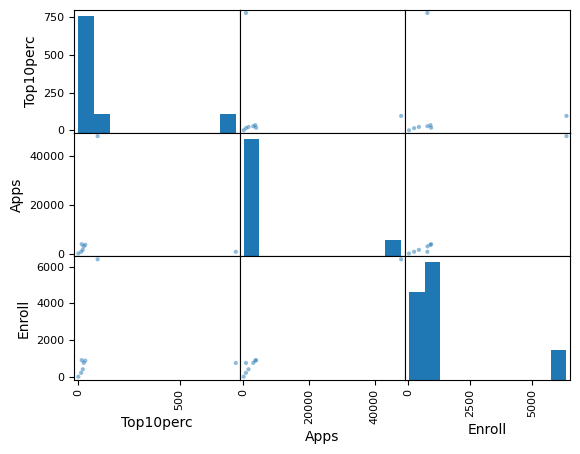

In [104]:
pd.plotting.scatter_matrix(college_df_describe[["Top10perc", "Apps", "Enroll"]])

<Axes: >

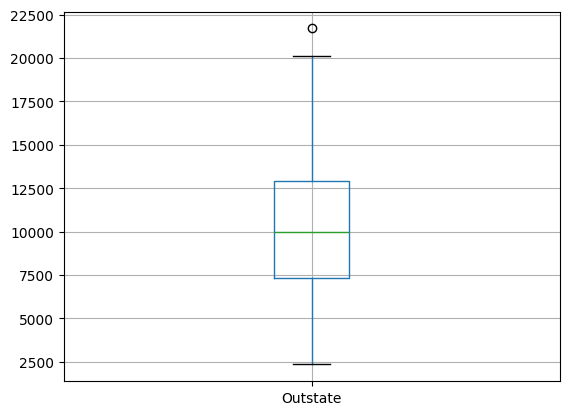

In [105]:
# college_df.columns
pd.plotting.boxplot(college_df[["Outstate", "Private"]])

In [110]:
college_df['Elite'] = pd.cut(college_df['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])

In [111]:
college_df['Elite'].value_counts()

Yes    3
No     0
Name: Elite, dtype: int64

<Axes: ylabel='Frequency'>

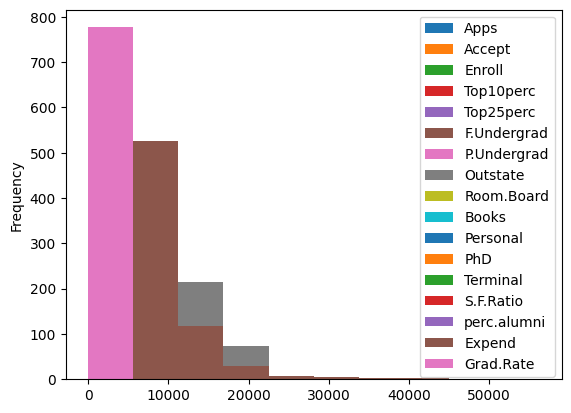

In [112]:
college_df.plot.hist()

# Auto dataset - 9 Exercise

In [113]:
auto_df = pd.read_csv(os.path.join(ISLP_DATA_PATH, "Auto.csv"))
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [114]:

for column in auto_df.columns:
    print(f"Column: {column} has range: ({np.min(auto_df[column])}, {np.max(auto_df[column])})")

Column: mpg has range: (9.0, 46.6)
Column: cylinders has range: (3, 8)
Column: displacement has range: (68.0, 455.0)
Column: horsepower has range: (46, 230)
Column: weight has range: (1613, 5140)
Column: acceleration has range: (8.0, 24.8)
Column: year has range: (70, 82)
Column: origin has range: (1, 3)
Column: name has range: (amc ambassador brougham, vw rabbit custom)


In [119]:
from sklearn.metrics import mean_squared_error

for column in auto_df.columns:
    print(mean_squared_error(auto_df[column], np.zeros(auto_df[column].shape)))

610.4738265306122
32.84438775510204
48718.45471938775
12391.642857142857
9585651.757653061
249.12474489795918
5786.433673469388
3.13265306122449


ValueError: could not convert string to float: 'chevrolet chevelle malibu'